# HELP - ELAIS-S1 Master List Creation

This notebook presents the creation of the HELP master list on the ELAIS-S1 field. Details of this and all fields/surveys taken from https://docs.google.com/spreadsheets/d/1b1rs4bn2ND4mrWA99yWfkt7ImyFJ9s7OX8fambYKnLE/edit#gid=0

<table>
  <tr>
    <th>Survey/Telescope/Instrument</th>
    <th>Filters</th>
    <th>Location</th>
    <th>Notes</th>
  </tr>
  <tr>
    <td>VIDEO	VISTA	VIRCAM		</td>
    <td>Z,Y,J,H,K</td>
    <td>dmu0_VISTA-VIDEO</td>
    <td></td>
  </tr>
  <tr>
    <td>ESIS/ESO 2.2/WFI</td>
    <td>BVR</td>
    <td>dmu0_ESIS-VOICE</td>
    <td></td>
  </tr>
  <tr>
    <td>SERVS/Spitzer/IRAC		</td>
    <td>IRAC12</td>
    <td>dmu0_DataFusion-Spitzer</td>
    <td></td>
  </tr>
  <tr>
    <td>SWIRE/Spitzer/IRAC & MIPS</td>
    <td>IRAC1234 & MIPS123</td>
    <td>dmu0_DataFusion-Spitzer</td>
    <td></td>
  </tr>
  <tr>
    <td>DES-DEEP/Blanco/DECAM</td>
    <td>grizy</td>
    <td></td>
    <td>Awaiting release...</td>
  </tr>
</table>


In [1]:
from herschelhelp_internal import git_version
print("This notebook was run with herschelhelp_internal version: \n{}".format(git_version()))

This notebook was run with herschelhelp_internal version: 
7452f47 (Thu Mar 23 14:08:22 2017 +0000)


In [2]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))

from astropy.table import Column, Table
from astropy import units as u
from astropy.coordinates import SkyCoord
import numpy as np
import seaborn as sns
from pymoc import MOC
from matplotlib_venn import venn3

from herschelhelp_internal import flagging, utils, masterlist

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
import locale
locale.setlocale(locale.LC_ALL, 'en_GB')

'en_GB'

In [4]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

## I - Pristine catalogues preparation

### I.a - VISTA telescope/VIRCAM camera/VIDEO survey (VISTA-VIDEO)

The catalogue comes from `dmu0_VISTA_VIDEO-private`.

There is an old public version of the catalogue but we are using the newer private version in the hope that it will be public by the time we publish the masterlist.

Filters: Z,Y,J,H,K 

In the catalogue, we keep:

- The identifier (it's unique in the catalogue);
- The position (degrees);
- The stellarity;
- The magnitude for each band in apertude 3, which is 2 arcsec (rs548 presumes same for private catalogue).
- The “auto” magnitude is provided, we presume this is standard Sextractor units etc.

Yannick said the dates of observation for VIDEO are from 2009/11 to 2016/12. There is a paper from 2012 (Jarvis et al). So will use 2012.

In [22]:
#Both flux and mag available in pristine catalogues
#I think these are still 2 arcsec aperture phtometriers and need to be replaceed with 3 arcsec.
#There is a PSTAR for each band and they vary quite a bit. I took the J band because it is in the middle
video = Table.read("../../dmu0/dmu0_VISTA-VIDEO-private/data/VIDEO-all_2016-04-14_fullcat_errfix_ELAIS-S1.fits")[
    'ID', 'ALPHA_J2000', 'DELTA_J2000', 'J_CLASS_STAR',     
    'Z_MAG_APER_3', 'Z_MAGERR_APER_3', 'Z_MAG_AUTO', 'Z_MAGERR_AUTO',
    'Z_FLUX_APER_3', 'Z_FLUXERR_APER_3', 'Z_FLUX_AUTO', 'Z_FLUXERR_AUTO',
    'Y_MAG_APER_3', 'Y_MAGERR_APER_3', 'Y_MAG_AUTO', 'Y_MAGERR_AUTO',
    'Y_FLUX_APER_3', 'Y_FLUXERR_APER_3', 'Y_FLUX_AUTO', 'Y_FLUXERR_AUTO',
    'J_MAG_APER_3', 'J_MAGERR_APER_3', 'J_MAG_AUTO', 'J_MAGERR_AUTO',
    'J_FLUX_APER_3', 'J_FLUXERR_APER_3', 'J_FLUX_AUTO', 'J_FLUXERR_AUTO',
    'H_MAG_APER_3', 'H_MAGERR_APER_3', 'H_MAG_AUTO', 'H_MAGERR_AUTO',
    'H_FLUX_APER_3', 'H_FLUXERR_APER_3', 'H_FLUX_AUTO', 'H_FLUXERR_AUTO',
    'K_MAG_APER_3', 'K_MAGERR_APER_3', 'K_MAG_AUTO', 'K_MAGERR_AUTO',
    'K_FLUX_APER_3', 'K_FLUXERR_APER_3', 'K_FLUX_AUTO', 'K_FLUXERR_AUTO']
video = Table(video.as_array(), names=[
    'video_id', 'video_ra', 'video_dec', 'video_stellarity',
    'm_app_video_z', 'merr_app_video_z', 'm_video_z', 'merr_video_z',
    'f_app_video_z', 'ferr_app_video_z', 'f_video_z', 'ferr_video_z',
    'm_app_video_y', 'merr_app_video_y', 'm_video_y', 'merr_video_y',
    'f_app_video_y', 'ferr_app_video_y', 'f_video_y', 'ferr_video_y',
    'm_app_video_j', 'merr_app_video_j', 'm_video_j', 'merr_video_j',
    'f_app_video_j', 'ferr_app_video_j', 'f_video_j', 'ferr_video_j',
    'm_app_video_h', 'merr_app_video_h', 'm_video_h', 'merr_video_h',
    'f_app_video_h', 'ferr_app_video_h', 'f_video_h', 'ferr_video_h',
    'm_app_video_k', 'merr_app_video_k', 'm_video_k', 'merr_video_k',
    'f_app_video_k', 'ferr_app_video_k', 'f_video_k', 'ferr_video_k',
])

video_epoch = 2012
#MOC made using stilts: stilts pixfoot in=VIDEO-all_2016-04-14_fullcat_errfix_ELAIS-S1.fits
#out=VIDEO-all_2016-04-14_fullcat_errfix_ELAIS-S1_MOC.fits ra=ALPHA_J2000 dec=DELTA_J2000 order=13
video_moc = MOC(filename="../../dmu0/dmu0_VISTA-VIDEO-private/data/VIDEO-all_2016-04-14_fullcat_errfix_ELAIS-S1_MOC.fits")

# Adding band-flag columns
for col in video.colnames:
    if col.startswith('m_'):
        
        #errcol = "merr{}".format(col[1:])
        #flux, error = utils.mag_to_flux(np.array(video[col]), np.array(video[errcol]))

        # Fluxes are added in µJy
        #video.add_column(Column(flux * 1.e6, name="f{}".format(col[1:])))
        #video.add_column(Column(error * 1.e6, name="f{}".format(errcol[1:])))
        
        # Band-flag column
        video.add_column(Column(np.zeros(len(video), dtype=bool), name="flag{}".format(col[1:])))
        
# TODO: Set to True the flag columns for fluxes that should not be used for SED fitting.

In [7]:
video[:10].show_in_notebook()

idx,video_id,video_ra,video_dec,video_stellarity,m_app_video_z,merr_app_video_z,m_video_z,merr_video_z,f_app_video_z,ferr_app_video_z,f_video_z,ferr_video_z,m_app_video_y,merr_app_video_y,m_video_y,merr_video_y,f_app_video_y,ferr_app_video_y,f_video_y,ferr_video_y,m_app_video_j,merr_app_video_j,m_video_j,merr_video_j,f_app_video_j,ferr_app_video_j,f_video_j,ferr_video_j,m_app_video_h,merr_app_video_h,m_video_h,merr_video_h,f_app_video_h,ferr_app_video_h,f_video_h,ferr_video_h,m_app_video_k,merr_app_video_k,m_video_k,merr_video_k,f_app_video_k,ferr_app_video_k,f_video_k,ferr_video_k,flag_app_video_z,flag_video_z,flag_app_video_y,flag_video_y,flag_app_video_j,flag_video_j,flag_app_video_h,flag_video_h,flag_app_video_k,flag_video_k
0,1172949,8.73911207493,-44.3163741732,0.647381,23.6538,0.0904351,23.7015,0.20237,345.512,28.7799,330.679,61.6372,23.6564,0.121039,23.7151,0.268558,344.69,38.4276,326.559,80.7774,23.581,0.214983,23.5894,0.414643,369.501,73.1663,366.629,140.02,23.1431,0.174405,23.1896,0.352588,553.021,88.8363,529.859,172.075,22.9304,0.185836,22.9452,0.357875,672.756,115.154,663.602,218.741,False,False,False,False,False,False,False,False,False,False
1,1172973,8.77792293493,-44.3164642625,0.00853839,24.6577,0.22792,24.611,0.468837,137.067,28.7744,143.093,61.7917,24.0174,0.168794,23.9655,0.339071,247.202,38.4327,259.301,80.9812,24.2077,0.382912,24.1996,0.730206,207.449,73.1644,209.002,140.568,23.5264,0.248274,23.4241,0.43897,388.548,88.8519,426.914,172.61,23.6743,0.368611,23.6203,0.669125,339.065,115.118,356.347,219.619,False,False,False,False,False,False,False,False,False,False
2,1172975,8.69528531749,-44.3159522586,0.376932,23.8339,0.10702,23.9333,0.25013,292.707,28.8527,267.102,61.5365,23.7176,0.128075,23.8263,0.29698,325.814,38.4349,294.757,80.6272,23.5642,0.211703,23.6381,0.432349,375.238,73.1684,350.565,139.602,24.051,0.402325,23.9272,0.693881,239.668,88.813,268.607,171.669,23.5282,0.323012,23.4899,0.589396,387.917,115.411,401.812,218.133,False,False,False,False,False,False,False,False,False,False
3,1172981,8.69972161846,-44.3159767125,0.288115,22.3146,0.0264145,22.268,0.0542797,1186.22,28.8601,1238.18,61.9029,22.2259,0.0324238,22.1852,0.0658645,1287.2,38.4415,1336.31,81.0677,21.9521,0.0479716,21.9212,0.0897069,1656.43,73.1892,1704.14,140.806,21.9333,0.0572335,21.9077,0.108738,1685.24,88.8389,1725.49,172.815,21.6885,0.0593356,21.6714,0.111431,2111.59,115.402,2145.14,220.166,False,False,False,False,False,False,False,False,False,False
4,1172991,8.8752329118,-44.3169344676,0.680897,24.7862,0.256981,24.9329,0.628039,121.763,28.8207,106.375,61.5343,24.0235,0.170214,24.199,0.418763,245.804,38.5368,209.123,80.6603,23.7012,0.240869,23.8829,0.54202,330.753,73.3795,279.796,139.684,23.5962,0.265482,23.6802,0.552997,364.359,89.0955,337.232,171.768,23.4299,0.294921,23.4558,0.571177,424.672,115.358,414.662,218.15,False,False,False,False,False,False,False,False,False,False
5,1173002,8.75029613193,-44.3162059254,0.00183158,24.6854,0.233754,24.661,0.491618,133.616,28.7678,136.641,61.8727,24.876,0.372073,25.0837,0.95084,112.099,38.4167,92.5816,81.0816,23.5523,0.209257,23.5037,0.385408,379.386,73.1225,396.744,140.838,23.0555,0.160833,23.1048,0.327591,599.491,88.807,572.918,172.868,22.4702,0.121559,22.4457,0.227295,1027.86,115.083,1051.24,220.081,False,False,False,False,False,False,False,False,False,False
6,1173005,8.8556464613,-44.3167141616,0.0743998,21.8313,0.0169011,21.7296,0.0331041,1851.26,28.8186,2033.12,61.992,21.7082,0.0201715,21.6219,0.0393013,2073.67,38.5273,2245.12,81.2709,21.6731,0.0371914,21.6349,0.0691664,2141.74,73.3667,2218.5,141.333,21.4858,0.0379885,21.4229,0.0697902,2545.02,89.0498,2696.71,173.348,21.3155,0.0420149,21.2858,0.0783106,2977.27,115.216,3059.66,220.691,False,False,False,False,False,False,False,False,False,False
7,1173011,8.88274023515,-44.3168889142,0.446934,23.7004,0.0945424,23.9031,0.243463,331.017,28.8248,274.648,61.5884,23.781,0.136155,23.9676,0.338691,307.335,38.5423,258.796,80.7332,23.4109,0.184503,

### I.b - ESO 2.2 (VST?) telescope/WFI camera/ESIS survey

According to Mattia's website (http://www.mattiavaccari.net/voice/) the survey was originally going to be called VOICE but has changed and is now called ESIS for ELAIS S1 and only VOICE for CDFS. This is based on our working spreadheet linked at the top.

In the catalogue, we keep:

- The identifier (it's unique in the catalogue);
- The position;
- The stellarity;
- The magnitude for each band in apertude 3 (2 arcsec).
- The kron magnitude to be used as total magnitude (no “auto” magnitude is provided).


"Observations started in 2011 and are expected to be completed by 2016."
Epoch?


In [12]:
#Aperture 6 is 3 arcsec, Aperture 4 is 2 arcsec. We are now using 3 arcsec!
#There appear to be four bands in the catalogue B99/B123/V89/R162 (1/2/3/4)
#Multiple class star - for each band
voice = Table.read("../../dmu0/dmu0_ESIS-VOICE/data/esis_b2vr_cat_03_HELP-coverage.fits")[
    'ID', 'ALPHA_J2000', 'DELTA_J2000', 'CLASS_STAR_2',     
    'MAG_APER_6_1', 'MAGERR_APER_6_1', 'MAG_AUTO_1', 'MAGERR_AUTO_1',
    'MAG_APER_6_2', 'MAGERR_APER_6_2', 'MAG_AUTO_2', 'MAGERR_AUTO_2',
    'MAG_APER_6_3', 'MAGERR_APER_6_3', 'MAG_AUTO_3', 'MAGERR_AUTO_3',
    'MAG_APER_6_4', 'MAGERR_APER_6_4', 'MAG_AUTO_4', 'MAGERR_AUTO_4']
voice = Table(voice.as_array(), names=[
    'voice_id', 'voice_ra', 'voice_dec', 'voice_stellarity',
    'm_app_voice_b99', 'merr_app_voice_b99', 'm_voice_b99', 'merr_voice_b99',
    'm_app_voice_b123', 'merr_app_voice_b123', 'm_voice_b123', 'merr_voice_b123',
    'm_app_voice_v', 'merr_app_voice_v', 'm_voice_v', 'merr_voice_v',
    'm_app_voice_r', 'merr_app_voice_r', 'm_voice_r', 'merr_voice_r'
])
voice_epoch = 2016 #TODO: Check this
#MOC made using 'stilts pixfoot in=esis_b2vr_cat_03_HELP-coverage.fits 
#order=13 mocfmt=fits ra=ALPHA_J2000 dec=DELTA_J2000 out=esis_elais-s1-MOC-o13.fits'
voice_moc = MOC(filename="../../dmu0/dmu0_ESIS-VOICE/data/esis_elais-s1_MOC.fits")

# Adding flux and band-flag columns
for col in voice.colnames:
    if col.startswith('m_'):
        errcol = "merr{}".format(col[1:])
        
        # voice uses 99. for missing values
        voice[col][voice[col] == 99.] = np.nan
        voice[errcol][voice[errcol] == 99.] = np.nan
        
        flux, error = utils.mag_to_flux(np.array(voice[col]), np.array(voice[errcol]))

        # Fluxes are added in µJy
        voice.add_column(Column(flux * 1.e6, name="f{}".format(col[1:])))
        voice.add_column(Column(error * 1.e6, name="f{}".format(errcol[1:])))
        
        # Band-flag column
        voice.add_column(Column(np.zeros(len(voice), dtype=bool), name="flag{}".format(col[1:])))
        
# TODO: Set to True the flag columns for fluxes that should not be used for SED fitting.        
        

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/astropy/table/column.py:1096: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  ma.MaskedArray.__setitem__(self, index, value)


In [13]:
voice[:10].show_in_notebook()

idx,voice_id,voice_ra,voice_dec,voice_stellarity,m_app_voice_b99,merr_app_voice_b99,m_voice_b99,merr_voice_b99,m_app_voice_b123,merr_app_voice_b123,m_voice_b123,merr_voice_b123,m_app_voice_v,merr_app_voice_v,m_voice_v,merr_voice_v,m_app_voice_r,merr_app_voice_r,m_voice_r,merr_voice_r,f_app_voice_b99,ferr_app_voice_b99,flag_app_voice_b99,f_voice_b99,ferr_voice_b99,flag_voice_b99,f_app_voice_b123,ferr_app_voice_b123,flag_app_voice_b123,f_voice_b123,ferr_voice_b123,flag_voice_b123,f_app_voice_v,ferr_app_voice_v,flag_app_voice_v,f_voice_v,ferr_voice_v,flag_voice_v,f_app_voice_r,ferr_app_voice_r,flag_app_voice_r,f_voice_r,ferr_voice_r,flag_voice_r
0,1,9.17825712092,-43.955836523,0.986996,13.2015,5.53038e-05,12.7221,5.16706e-05,13.426,6.43337e-05,12.8877,5.22983e-05,12.7827,5.21861e-05,12.2352,4.02783e-05,13.145,4.11011e-05,12.2731,4.22112e-05,19028.4,0.969242,False,29592.0,1.40829,False,15473.9,0.91688,False,25405.1,1.22372,False,27984.7,1.34509,False,46337.8,1.71902,False,20045.6,0.758837,False,44747.6,1.7397,False
1,2,9.47919711452,-43.9648762673,0.982173,13.3401,5.35139e-05,12.0554,3.64481e-05,13.2822,4.3041e-05,11.7522,2.88469e-05,12.9089,4.83128e-05,11.1475,3.09307e-05,nan,nan,nan,nan,16748.4,0.825497,False,54682.7,1.83569,False,17665.9,0.700314,False,72297.2,1.92086,False,24913.1,1.10858,False,126179.0,3.5946,False,nan,nan,False,nan,nan,False
2,3,9.38616907676,-43.9722384073,0.999861,14.1382,8.37772e-05,14.0156,7.99634e-05,14.2397,5.98378e-05,14.0903,5.68381e-05,13.7591,7.40671e-05,13.6356,7.10772e-05,13.6582,4.15792e-05,13.4066,3.9822e-05,8029.85,0.619597,False,8990.02,0.662107,False,7313.43,0.403063,False,8392.67,0.439354,False,11385.5,0.776697,False,12757.7,0.835178,False,12494.3,0.478482,False,15752.8,0.577771,False
3,4,9.85183392833,-43.9831608454,0.997188,13.491,0.000132027,13.2806,0.000119572,13.8217,5.41313e-05,13.5524,4.90276e-05,13.0902,0.000102156,12.8226,9.92741e-05,13.3105,4.68101e-05,12.5802,5.177e-05,14575.1,1.77235,False,17691.8,1.9484,False,10747.9,0.535854,False,13773.4,0.621953,False,21081.9,1.98359,False,26975.1,2.46646,False,17211.1,0.742031,False,33722.3,1.60795,False
4,5,8.82068013986,-43.9885337429,0.970392,13.1143,0.000283705,11.3499,0.000112695,13.2286,5.47954e-05,11.1735,2.61241e-05,12.6745,7.29092e-05,10.8482,3.71954e-05,13.0739,6.55288e-05,11.0449,3.27186e-05,20619.4,5.38789,False,104721.0,10.8696,False,18559.2,0.936655,False,123203.0,2.96439,False,30917.6,2.07617,False,166233.0,5.69484,False,21402.2,1.29171,False,138687.0,4.17933,False
5,6,8.79679406122,-43.9850531388,0.0286267,17.8418,0.00104722,15.058,0.000852961,18.0002,0.000638794,14.8657,0.000381861,17.2904,0.000682179,14.2728,0.000451806,16.3488,0.000316241,13.2539,0.000339681,265.026,0.255625,False,3441.8,2.70389,False,229.055,0.134765,False,4108.71,1.44506,False,440.387,0.2767,False,7093.89,2.95197,False,1048.3,0.305338,False,18131.4,5.67256,False
6,7,8.80327818802,-43.9855703407,nan,19.9305,0.00443245,19.7822,0.00610169,nan,nan,nan,nan,nan,nan,nan,nan,17.7853,0.00074902,17.7011,0.000869065,38.7096,0.158029,False,44.3738,0.249375,False,nan,nan,False,nan,nan,False,nan,nan,False,nan,nan,False,279.168,0.192591,False,301.698,0.241491,False
7,8,9.84925878674,-43.9855297377,0.960899,13.1229,0.000102692,12.4718,8.48421e-05,13.5098,4.86608e-05,12.639,3.92947e-05,12.7668,7.27436e-05,12.0793,6.75566e-05,13.2207,4.64572e-05,11.8414,3.80297e-05,20457.2,1.93491,False,37263.7,2.91188,False,14324.3,0.641991,False,31946.1,1.15618,False,28398.3,1.90266,False,53491.7,3.32836,False,18694.2,0.799899,False,66593.0,2.33253,False
8,9,9.91952030686,-43.9863998576,nan,20.525,0.0078127,16.9629,0.00351602,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,22.388,0.161099,False,595.445,1.92827,False,nan,nan,False,nan,nan,False,nan,nan,False,nan,nan,False,nan,nan,False,nan,nan,False
9,10,9.91810905718,-43.9860436565,nan,21.7086,0.0164563,20.1979,0.0135056,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,7.52564,0.114065,False,30.2569,0.376369,False,nan,nan,False,nan,nan,

### I.c - Spitzer datafusion SERVS

The Spitzer catalogues were produced by the datafusion team are available in the HELP virtual observatory server. They are described there: http://vohedamtest.lam.fr/browse/df_spitzer/q.

Lucia told that the magnitudes are aperture corrected.

In the catalouge, we keep:

- The internal identifier (this one is only in HeDaM data);
- The position;
- The fluxes in aperture 2 (1.9 arcsec);
- The “auto” flux (which seems to be the Kron flux);
- The stellarity in each band

A query of the position in the Spitzer heritage archive show that the SERVS-ELAIS-N1 images were observed in 2009. Let's take this as epoch.

In [15]:
servs = Table.read("../../dmu0/dmu0_DataFusion-Spitzer/data/DF-SERVS_ELAIS-S1.fits")[
    'internal_id', 'ra_12', 'dec_12',   
    'flux_aper_2_1', 'fluxerr_aper_2_1', 'flux_auto_1', 'fluxerr_auto_1', 'class_star_1',
    'flux_aper_2_2', 'fluxerr_aper_2_2', 'flux_auto_2', 'fluxerr_auto_2', 'class_star_2']

servs = Table(servs.as_array(), names=[
    'servs_intid', 'servs_ra', 'servs_dec',
    'f_app_servs_irac1', 'ferr_app_servs_irac1', 'f_servs_irac1', 'ferr_servs_irac1', 'servs_stellarity_irac1',
    'f_app_servs_irac2', 'ferr_app_servs_irac2', 'f_servs_irac2', 'ferr_servs_irac2', 'servs_stellarity_irac2'
])
servs_epoch = 2009
servs_moc = MOC(filename="../../dmu0/dmu0_DataFusion-Spitzer/data/DF-SERVS_ELAIS-S1_MOC.fits")

# Adding magnitude and band-flag columns
for col in servs.colnames:
    if col.startswith('f_'):
        errcol = "ferr{}".format(col[1:])
        
        magnitude, error = utils.flux_to_mag(
            np.array(servs[col])/1.e6, np.array(servs[errcol])/1.e6)
        # Note that some fluxes are 0.
        
        servs.add_column(Column(magnitude, name="m{}".format(col[1:])))
        servs.add_column(Column(error, name="m{}".format(errcol[1:])))
        
        # Band-flag column
        servs.add_column(Column(np.zeros(len(servs), dtype=bool), name="flag{}".format(col[1:])))
        
# TODO: Set to True the flag columns for fluxes that should not be used for SED fitting.

/Users/rs548/GitHub/herschelhelp_internal/herschelhelp_internal/utils.py:76: RuntimeWarning: invalid value encountered in log10
  magnitudes = 2.5 * (23 - np.log10(fluxes)) - 48.6


In [16]:
servs[:10].show_in_notebook()

idx,servs_intid,servs_ra,servs_dec,f_app_servs_irac1,ferr_app_servs_irac1,f_servs_irac1,ferr_servs_irac1,servs_stellarity_irac1,f_app_servs_irac2,ferr_app_servs_irac2,f_servs_irac2,ferr_servs_irac2,servs_stellarity_irac2,m_app_servs_irac1,merr_app_servs_irac1,flag_app_servs_irac1,m_servs_irac1,merr_servs_irac1,flag_servs_irac1,m_app_servs_irac2,merr_app_servs_irac2,flag_app_servs_irac2,m_servs_irac2,merr_servs_irac2,flag_servs_irac2
0,1626673,8.6889185,-44.31550575,10.8039879324,0.497846074952,9.40826321623,0.638316883349,0.98,12.5414659354,0.482580435942,11.3538291849,0.642739536626,0.93,21.3160397739,0.0500305545837,False,21.466226352,0.073663303676,False,21.1541292428,0.0417778155847,False,21.2621441097,0.0614634564055,False
1,1625734,8.6892883,-44.31309265,0.926873219682,0.432017786098,0.844688624479,0.362409184921,0.21,1.21348875176,0.48094560754,0.865911281597,0.514196032363,0.25,23.9824491645,0.506064196813,False,24.0832583862,0.465829373811,False,23.6899106123,0.430313060477,False,24.0563165052,0.644732619316,False
2,1625538,8.6872617,-44.305071,0.780631532985,0.417002491945,0.616612516009,0.509910928842,0.03,nan,nan,nan,nan,nan,24.1688847743,0.579985157975,False,24.4249691605,0.897855204479,False,nan,nan,False,nan,nan,False
3,1625352,8.68820475,-44.30470125,0.993935509252,0.424037168935,0.818887790808,0.264883950176,0.54,1.32411639768,0.5630869835,1.05898894356,0.666633261393,0.04,23.9066044839,0.463201588222,False,24.1169390099,0.351200858035,False,23.5951845904,0.461714638899,False,23.8377714354,0.683470655281,False
4,1624988,8.6954282,-44.31597565,2.01589268266,0.402969037955,1.65703153417,0.358930115816,0.52,0.653565582227,0.424044023722,0.619751741894,0.335325358451,0.4,23.1388314789,0.21703440747,False,23.3516730666,0.235181656887,False,24.3617770662,0.70444338179,False,24.4194556098,0.587452777351,False
5,1809874,8.6913837,-44.3147046,nan,nan,nan,nan,nan,0.0869600515976,0.48121807894,0.286351453017,0.212597960582,0.38,nan,nan,False,nan,nan,False,26.5517005281,6.00822884866,False,25.2577515221,0.806090908323,False
6,1624718,8.6998302,-44.31607055,10.3602394554,0.411555774827,10.3452990103,0.592493757235,0.87,6.81140066377,0.431134193139,7.68678714305,0.815851174602,0.75,21.3615755167,0.0431303742477,False,21.363142381,0.0621820522234,False,21.8169089317,0.0687227232263,False,21.6856378623,0.115236592542,False
7,1624428,8.6997765,-44.31382755,3.11561144944,0.388651334721,2.93807150642,0.473803461534,0.08,2.23992423153,0.452601249771,1.75141449625,0.375348515941,0.6,22.6661417721,0.135438205945,False,22.7298440965,0.175089534412,False,23.02441668,0.21938490431,False,23.29152765,0.232685908466,False
8,1625383,8.6915848,-44.31235935,4.02952563301,0.44916839204,3.54172365752,0.617974717068,0.81,5.34616087365,0.528282782948,4.47502257355,0.530867211078,0.72,22.386865193,0.121026252141,False,22.526963319,0.189443781849,False,22.0798949421,0.107287408171,False,22.273011924,0.128799741568,False
9,1625216,8.6942946,-44.3128322,1.42684268074,0.4077449662,1.82404368191,0.604218603786,0.25,nan,nan,nan,nan,nan,23.5140597705,0.310267892941,False,23.2474119137,0.359652578623,False,nan,nan,False,nan,nan,False


### I.d - Spitzer datafusion SWIRE

The Spitzer catalogues were produced by the datafusion team are available in the HELP virtual observatory server. They are described there: http://vohedamtest.lam.fr/browse/df_spitzer/q.

Lucia told that the magnitudes are aperture corrected.

In the catalouge, we keep:

We keep:
- The internal identifier (this one is only in HeDaM data);
- The position;
- The fluxes in aperture 2 (1.9 arcsec) for IRAC bands.
- The Kron flux;
- The stellarity in each band

A query of the position in the Spitzer heritage archive show that the ELAIS-N1 images were observed in 2004. Let's take this as epoch.

We do not use the MIPS fluxes as they will be extracted on MIPS maps using XID+.

In [17]:
swire = Table.read("../../dmu0/dmu0_DataFusion-Spitzer/data/DF-SWIRE_ELAIS-S1.fits")[
    'internal_id', 'ra_spitzer', 'dec_spitzer',      
    'flux_ap2_36', 'uncf_ap2_36', 'flux_kr_36', 'uncf_kr_36', 'stell_36',
    'flux_ap2_45', 'uncf_ap2_45', 'flux_kr_45', 'uncf_kr_45', 'stell_45',
    'flux_ap2_58', 'uncf_ap2_58', 'flux_kr_58', 'uncf_kr_58', 'stell_58',
    'flux_ap2_80', 'uncf_ap2_80', 'flux_kr_80', 'uncf_kr_80', 'stell_80']

swire = Table(swire.as_array(), names=[
    'swire_intid', 'swire_ra', 'swire_dec',
    'f_app_swire_irac1', 'ferr_app_swire_irac1', 'f_swire_irac1', 'ferr_swire_irac1', 'swire_stellarity_irac1',
    'f_app_swire_irac2', 'ferr_app_swire_irac2', 'f_swire_irac2', 'ferr_swire_irac2', 'swire_stellarity_irac2',
    'f_app_swire_irac3', 'ferr_app_swire_irac3', 'f_swire_irac3', 'ferr_swire_irac3', 'swire_stellarity_irac3',
    'f_app_swire_irac4', 'ferr_app_swire_irac4', 'f_swire_irac4', 'ferr_swire_irac4', 'swire_stellarity_irac4'
])
swire_epoch = 2004
swire_moc = MOC(filename="../../dmu0/dmu0_DataFusion-Spitzer/data/DF-SWIRE_ELAIS-S1_MOC.fits")
        
# Adding magnitude and band-flag columns
for col in swire.colnames:
    if col.startswith('f_'):
        errcol = "ferr{}".format(col[1:])
        
        magnitude, error = utils.flux_to_mag(
            np.array(swire[col])/1.e6, np.array(swire[errcol])/1.e6)
        # Note that some fluxes are 0.
        
        swire.add_column(Column(magnitude, name="m{}".format(col[1:])))
        swire.add_column(Column(error, name="m{}".format(errcol[1:])))
        
        # Band-flag column
        swire.add_column(Column(
                np.zeros(len(swire), dtype=bool), name="flag{}".format(col[1:])))
        
# TODO: Set to True the flag columns for fluxes that should not be used for SED fitting.

In [18]:
swire[:10].show_in_notebook()

idx,swire_intid,swire_ra,swire_dec,f_app_swire_irac1,ferr_app_swire_irac1,f_swire_irac1,ferr_swire_irac1,swire_stellarity_irac1,f_app_swire_irac2,ferr_app_swire_irac2,f_swire_irac2,ferr_swire_irac2,swire_stellarity_irac2,f_app_swire_irac3,ferr_app_swire_irac3,f_swire_irac3,ferr_swire_irac3,swire_stellarity_irac3,f_app_swire_irac4,ferr_app_swire_irac4,f_swire_irac4,ferr_swire_irac4,swire_stellarity_irac4,m_app_swire_irac1,merr_app_swire_irac1,flag_app_swire_irac1,m_swire_irac1,merr_swire_irac1,flag_swire_irac1,m_app_swire_irac2,merr_app_swire_irac2,flag_app_swire_irac2,m_swire_irac2,merr_swire_irac2,flag_swire_irac2,m_app_swire_irac3,merr_app_swire_irac3,flag_app_swire_irac3,m_swire_irac3,merr_swire_irac3,flag_swire_irac3,m_app_swire_irac4,merr_app_swire_irac4,flag_app_swire_irac4,m_swire_irac4,merr_swire_irac4,flag_swire_irac4
0,1507400,8.688851,-44.315534,10.78,0.68,10.38,0.78,0.46,11.58,0.83,9.84,0.85,0.52,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,21.3184530979,0.0684879980738,False,21.3595066162,0.0815871136523,False,21.2407286015,0.0778204706347,False,21.4175122539,0.0937881884191,False,nan,nan,False,nan,nan,False,nan,nan,False,nan,nan,False
1,1507126,8.699711,-44.315984,9.09,0.67,8.6,0.77,0.45,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,21.5035902919,0.0800267609668,False,21.5637538719,0.0972112648446,False,nan,nan,False,nan,nan,False,nan,nan,False,nan,nan,False,nan,nan,False,nan,nan,False
2,1506726,8.714471,-44.315424,17.65,0.7,15.68,0.65,0.9,19.17,0.89,18.31,1.01,0.71,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,20.7831382257,0.0430603593955,False,20.9116348541,0.0450081972636,False,20.6934447178,0.050407158176,False,20.7432791392,0.0598904187223,False,nan,nan,False,nan,nan,False,nan,nan,False,nan,nan,False
3,1506856,8.706251,-44.311684,nan,nan,nan,nan,nan,6.13,0.75,4.49,0.62,0.14,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,False,21.9313488137,0.132838850501,False,22.2693841475,0.149923484844,False,nan,nan,False,nan,nan,False,nan,nan,False,nan,nan,False
4,1506568,8.714791,-44.308464,5.11,0.49,5.3,0.59,0.29,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,22.1289477497,0.104111690867,False,22.089310326,0.120864973737,False,nan,nan,False,nan,nan,False,nan,nan,False,nan,nan,False,nan,nan,False,nan,nan,False
5,1507229,8.690561,-44.310124,20.68,0.83,22.38,0.94,0.16,12.35,0.94,20.58,1.57,0.05,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,20.6111236639,0.0435764530923,False,20.5253497945,0.0456028611471,False,21.170832606,0.0826390309694,False,20.6163865739,0.0828282721803,False,nan,nan,False,nan,nan,False,nan,nan,False,nan,nan,False
6,1507180,8.691011,-44.308374,9.9,0.62,13.77,0.97,0.06,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,21.4109120135,0.067995600702,False,21.0526651494,0.0764825067985,False,nan,nan,False,nan,nan,False,nan,nan,False,nan,nan,False,nan,nan,False,nan,nan,False
7,1507080,8.694991,-44.307744,32.64,0.93,31.36,0.98,0.9,20.3,0.98,18.0,1.03,0.76,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,20.1156246248,0.0309354984812,False,20.159059865,0.0339292563987,False,20.6312599052,0.0524148512642,False,20.7618187372,0.0621282383834,False,nan,nan,False,nan,nan,False,nan,nan,False,nan,nan,False
8,1507112,8.692981,-44.307094,27.34,0.81,27.27,0.91,0.5,25.16,1.16,29.21,1.56,0.42,nan,nan,nan,nan,nan,47.76,4.96,25.78,3.21,0.38,20.3080037244,0.0321670199654,False,20.3107871551,0.0362310211342,False,20.3982234081,0.0500577900445,False,20.2361711076,0.0579852269573,False,nan,nan,False,nan,nan,False,19.7023392047,0.112756523777,False,20.3717927175,0.135190582516,False
9,1507142,8.690881,-44.306504,49.16,0.94,52.67,1.04,0.5,45.92,1.35,57.89,1.97,0.82,31.42,4.59,24.22,3.51,0.34,nan,nan,nan,nan,nan,19.6709703145,0.0207606190495,False,19.5960917041,0.021438497303,False,19.7449953015,0.031919509504,False,19.4934911261,0.0369476649399,False,20.1569845482,0.158610094839,False,20.439564653,0.15734657633,False,nan,nan,False,nan,nan,False


## II - Removal of duplicated sources

We remove duplicated objects from the input catalogues.

In [23]:
nb_video_orig = len(video)
video = masterlist.remove_duplicates(
    video, 'video_ra', 'video_dec', 
    sort_col=['merr_app_video_z', 'merr_app_video_y', 'merr_app_video_j', 'merr_app_video_h', 'merr_app_video_k'],
    flag_name='video_flag_cleaned')
nb_video = len(video)
print("VIDEO initial catalogue as {} sources.".format(nb_video_orig))
print("VIDEO cleaned catalogue as {} sources ({} removed).".format(nb_video, nb_video_orig - nb_video))
print("VIDEO has {} sources flagged as having been cleaned".format(np.sum(video['video_flag_cleaned'])))

VIDEO initial catalogue as 228168 sources.
VIDEO cleaned catalogue as 227711 sources (457 removed).
VIDEO has 453 sources flagged as having been cleaned


In [26]:
nb_voice_orig = len(voice)
voice = masterlist.remove_duplicates(
    voice, 'voice_ra', 'voice_dec', 
    sort_col=['merr_app_voice_b99', 'merr_app_voice_b123', 'merr_app_voice_v', 'merr_app_voice_r'],
    flag_name='voice_flag_cleaned')
nb_voice = len(voice)
print("VOICE initial catalogue as {} sources.".format(nb_voice_orig))
print("VOICE cleaned catalogue as {} sources ({} removed).".format(nb_voice, nb_voice_orig - nb_voice))
print("VOICE has {} sources flagged as having been cleaned".format(np.sum(voice['voice_flag_cleaned'])))

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/astropy/table/column.py:1096: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  ma.MaskedArray.__setitem__(self, index, value)


VOICE initial catalogue as 100635 sources.
VOICE cleaned catalogue as 99904 sources (731 removed).
VOICE has 591 sources flagged as having been cleaned


In [24]:
nb_servs_orig = len(servs)
servs = masterlist.remove_duplicates(
    servs, 'servs_ra', 'servs_dec', 
    sort_col=['ferr_app_servs_irac1', 'ferr_app_servs_irac2'],
    flag_name='servs_flag_cleaned')
nb_servs = len(servs)
print("SERVS initial catalogue as {} sources.".format(nb_servs_orig))
print("SERVS cleaned catalogue as {} sources ({} removed).".format(nb_servs, nb_servs_orig - nb_servs))
print("SERVS has {} sources flagged as having been cleaned".format(np.sum(servs['servs_flag_cleaned'])))

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/astropy/table/column.py:1096: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  ma.MaskedArray.__setitem__(self, index, value)


SERVS initial catalogue as 147610 sources.
SERVS cleaned catalogue as 147610 sources (0 removed).
SERVS has 0 sources flagged as having been cleaned


In [25]:
nb_swire_orig = len(swire)
swire = masterlist.remove_duplicates(
    swire, 'swire_ra', 'swire_dec', 
    sort_col=['ferr_app_swire_irac1', 'ferr_app_swire_irac2', 
              'ferr_app_swire_irac3', 'ferr_app_swire_irac4'],
    flag_name='swire_flag_cleaned')
nb_swire = len(swire)
print("SWIRE initial catalogue as {} sources.".format(nb_swire_orig))
print("SWIRE cleaned catalogue as {} sources ({} removed).".format(nb_swire, nb_swire_orig - nb_swire))
print("SWIRE has {} sources flagged as having been cleaned".format(np.sum(swire['swire_flag_cleaned'])))

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/astropy/table/column.py:1096: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  ma.MaskedArray.__setitem__(self, index, value)


SWIRE initial catalogue as 49678 sources.
SWIRE cleaned catalogue as 49673 sources (5 removed).
SWIRE has 5 sources flagged as having been cleaned


## III - Astrometry correction

We match the astrometry to the Gaia one. We limit the Gaia catalogue to sources with a g band flux between the 30th and the 70th percentile. Some quick tests show that this give the lower dispersion in the results.

In [28]:
gaia = Table.read("../../dmu0/dmu0_GAIA/data/GAIA_ELAIS-S1.fits")
gaia_coords = SkyCoord(gaia['ra'], gaia['dec'])

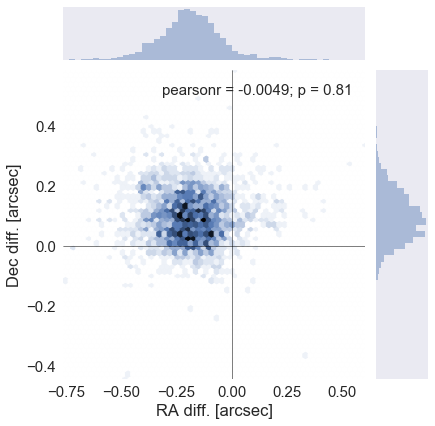

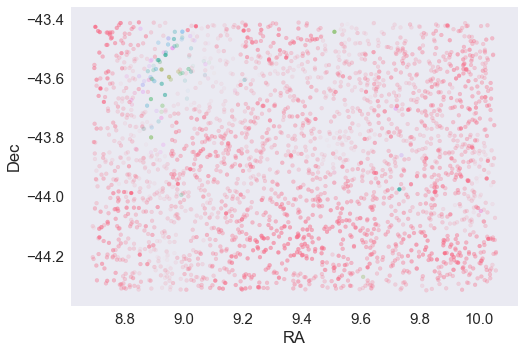

In [29]:
masterlist.nb_astcor_diag_plot(
    video['video_ra'], video['video_dec'], gaia_coords.ra, gaia_coords.dec)

In [30]:
video_delta_ra, video_delta_dec = utils.astrometric_correction(
    SkyCoord(video['video_ra'], video['video_dec']),
    gaia_coords
)
video['video_ra'] -= video_delta_ra.to(u.deg)
video['video_dec'] -= video_delta_dec.to(u.deg)

print("VIDEO delta RA / delta Dec: {} / {}".format(video_delta_ra, video_delta_dec))
#TODO: implement correction for any size of error

VIDEO delta RA / delta Dec: -0.18966151596444547 arcsec / 0.0 arcsec


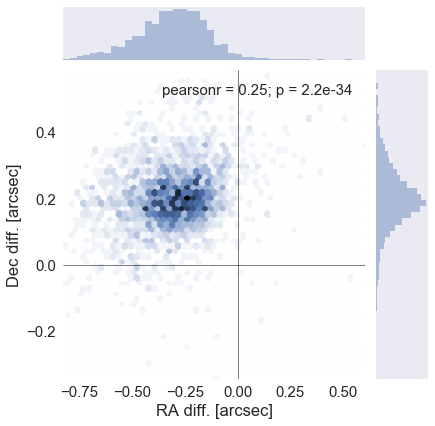

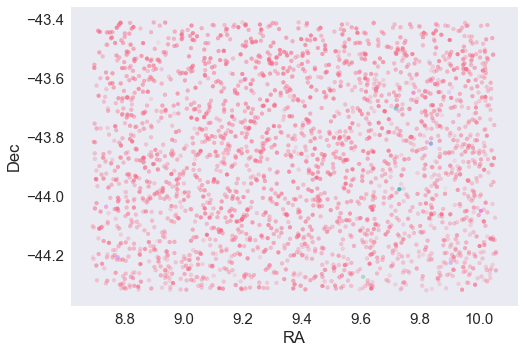

In [31]:
masterlist.nb_astcor_diag_plot(
    voice['voice_ra'], voice['voice_dec'], gaia_coords.ra, gaia_coords.dec)

In [32]:
voice_delta_ra, voice_delta_dec = utils.astrometric_correction(
    SkyCoord(voice['voice_ra'], voice['voice_dec']),
    gaia_coords
)
voice['voice_ra'] -= voice_delta_ra.to(u.deg)
voice['voice_dec'] -= voice_delta_dec.to(u.deg)

print("VOICE delta RA / delta Dec: {} / {}".format(voice_delta_ra, voice_delta_dec))

VOICE delta RA / delta Dec: -0.29934475093256196 arcsec / 0.19818944373639624 arcsec


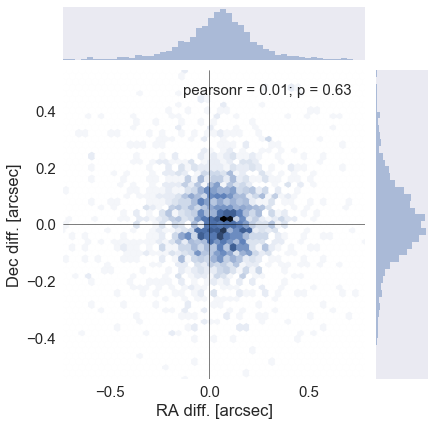

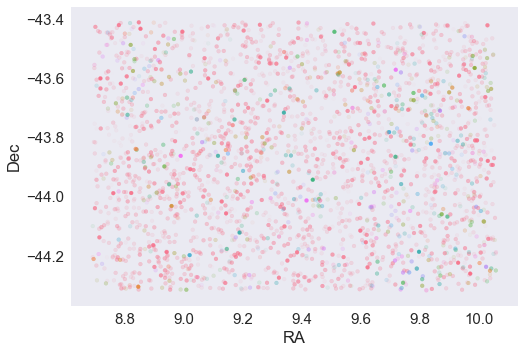

In [33]:
masterlist.nb_astcor_diag_plot(
    servs['servs_ra'], servs['servs_dec'], gaia_coords.ra, gaia_coords.dec)

In [34]:
servs_delta_ra, servs_delta_dec = utils.astrometric_correction(
    SkyCoord(servs['servs_ra'], servs['servs_dec']),
    gaia_coords
)
servs['servs_ra'] -= servs_delta_ra.to(u.deg)
servs['servs_dec'] -= servs_delta_dec.to(u.deg)

print("SERVS delta RA / delta Dec: {} / {}".format(servs_delta_ra, servs_delta_dec))

SERVS delta RA / delta Dec: 0.0 arcsec / 0.0 arcsec


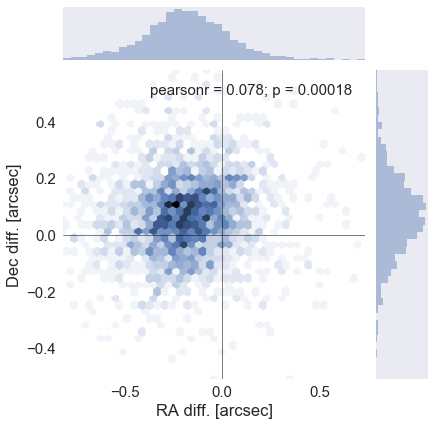

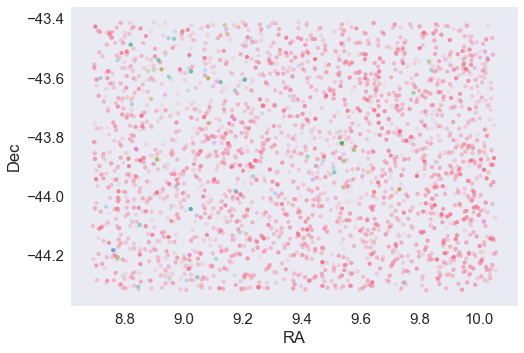

In [35]:
masterlist.nb_astcor_diag_plot(
    swire['swire_ra'], swire['swire_dec'], gaia_coords.ra, gaia_coords.dec)

In [36]:
swire_delta_ra, swire_delta_dec = utils.astrometric_correction(
    SkyCoord(swire['swire_ra'], swire['swire_dec']),
    gaia_coords
)
swire['swire_ra'] -= swire_delta_ra.to(u.deg)
swire['swire_dec'] -= swire_delta_dec.to(u.deg)

print("SWIRE delta RA / delta Dec: {} / {}".format(swire_delta_ra, swire_delta_dec))

SWIRE delta RA / delta Dec: -0.18950982787835358 arcsec / 0.0 arcsec


## IV - Flagging Gaia objects

In [37]:
video.add_column(
    flagging.gaia_flag_column(
        SkyCoord(video['video_ra'], video['video_dec']),
        video_epoch,
        gaia
    )
)
video['flag_gaia'].name = 'video_flag_gaia'
print("{} sources flagged.".format(np.sum(video['video_flag_gaia'] > 0)))

2519 sources flagged.


In [38]:
voice.add_column(
    flagging.gaia_flag_column(
        SkyCoord(voice['voice_ra'], voice['voice_dec']),
        voice_epoch,
        gaia
    )
)
voice['flag_gaia'].name = 'voice_flag_gaia'
print("{} sources flagged.".format(np.sum(voice['voice_flag_gaia'] > 0)))

2488 sources flagged.


In [39]:
servs.add_column(
    flagging.gaia_flag_column(
        SkyCoord(servs['servs_ra'], servs['servs_dec']),
        servs_epoch,
        gaia
    )
)
servs['flag_gaia'].name = 'servs_flag_gaia'
print("{} sources flagged.".format(np.sum(servs['servs_flag_gaia'] > 0)))

2418 sources flagged.


In [40]:
swire.add_column(
    flagging.gaia_flag_column(
        SkyCoord(swire['swire_ra'], swire['swire_dec']),
        swire_epoch,
        gaia
    )
)
swire['flag_gaia'].name = 'swire_flag_gaia'
print("{} sources flagged.".format(np.sum(swire['swire_flag_gaia'] > 0)))

2420 sources flagged.


## IV - Flagging objects near bright stars

## V- Merging the catalogues

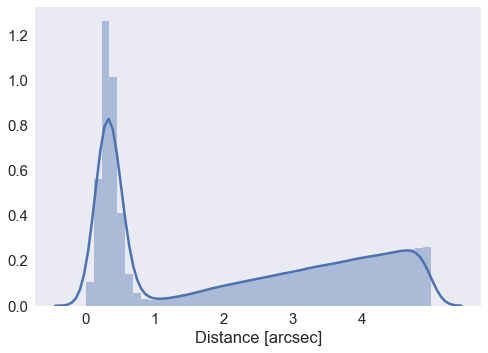

In [41]:
masterlist.nb_merge_dist_plot(
    SkyCoord(video['video_ra'], video['video_dec']),
    SkyCoord(voice['voice_ra'], voice['voice_dec'])
)

In [42]:
# Given the graph above, we use 0.8 arc-second radius
video['video_ra'].name = 'ra'
video['video_dec'].name = 'dec'
masterlist_catalogue = masterlist.merge_catalogues(
    video, voice, "voice_ra", "voice_dec")

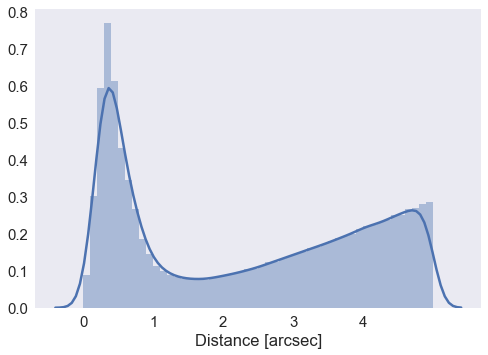

In [43]:
masterlist.nb_merge_dist_plot(
    SkyCoord(masterlist_catalogue['ra'], masterlist_catalogue['dec']),
    SkyCoord(servs['servs_ra'], servs['servs_dec'])
)

In [44]:
# Given the graph above, we use 1.2 arc-second radius
masterlist_catalogue = masterlist.merge_catalogues(
    masterlist_catalogue, servs, "servs_ra", "servs_dec")

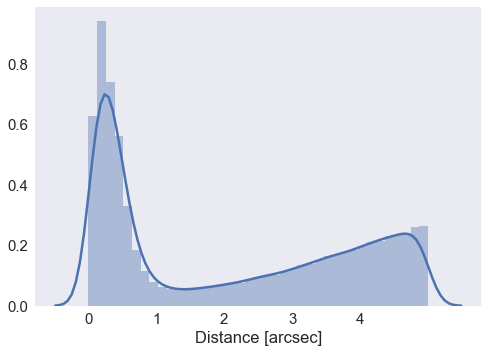

In [45]:
masterlist.nb_merge_dist_plot(
    SkyCoord(masterlist_catalogue['ra'], masterlist_catalogue['dec']),
    SkyCoord(swire['swire_ra'], swire['swire_dec'])
)

In [46]:
masterlist_catalogue = masterlist.merge_catalogues(
    masterlist_catalogue, swire, "swire_ra", "swire_dec")

In [47]:
# When we merge the catalogues, astropy masks the non-existent values (e.g. when a row comes
# only from a catalogue and has no counterparts in the other, the columns from the latest
# are masked for that row). We indicate to use NaN for masked values for floats columns and
# False for flag columns.
for col in masterlist_catalogue.colnames:
    if "m_" in col or "merr_" in col or "f_" in col or "ferr_" in col or "stellarity" in col:
        masterlist_catalogue[col].fill_value = np.nan
    elif "flag" in col:
        masterlist_catalogue[col].fill_value = False

In [48]:
masterlist_catalogue[:10].show_in_notebook()

idx,video_id,ra,dec,video_stellarity,m_app_video_z,merr_app_video_z,m_video_z,merr_video_z,f_app_video_z,ferr_app_video_z,f_video_z,ferr_video_z,m_app_video_y,merr_app_video_y,m_video_y,merr_video_y,f_app_video_y,ferr_app_video_y,f_video_y,ferr_video_y,m_app_video_j,merr_app_video_j,m_video_j,merr_video_j,f_app_video_j,ferr_app_video_j,f_video_j,ferr_video_j,m_app_video_h,merr_app_video_h,m_video_h,merr_video_h,f_app_video_h,ferr_app_video_h,f_video_h,ferr_video_h,m_app_video_k,merr_app_video_k,m_video_k,merr_video_k,f_app_video_k,ferr_app_video_k,f_video_k,ferr_video_k,flag_app_video_z,flag_video_z,flag_app_video_y,flag_video_y,flag_app_video_j,flag_video_j,flag_app_video_h,flag_video_h,flag_app_video_k,flag_video_k,video_flag_cleaned,video_flag_gaia,flag_merged,voice_id,voice_stellarity,m_app_voice_b99,merr_app_voice_b99,m_voice_b99,merr_voice_b99,m_app_voice_b123,merr_app_voice_b123,m_voice_b123,merr_voice_b123,m_app_voice_v,merr_app_voice_v,m_voice_v,merr_voice_v,m_app_voice_r,merr_app_voice_r,m_voice_r,merr_voice_r,f_app_voice_b99,ferr_app_voice_b99,flag_app_voice_b99,f_voice_b99,ferr_voice_b99,flag_voice_b99,f_app_voice_b123,ferr_app_voice_b123,flag_app_voice_b123,f_voice_b123,ferr_voice_b123,flag_voice_b123,f_app_voice_v,ferr_app_voice_v,flag_app_voice_v,f_voice_v,ferr_voice_v,flag_voice_v,f_app_voice_r,ferr_app_voice_r,flag_app_voice_r,f_voice_r,ferr_voice_r,flag_voice_r,voice_flag_cleaned,voice_flag_gaia,servs_intid,f_app_servs_irac1,ferr_app_servs_irac1,f_servs_irac1,ferr_servs_irac1,servs_stellarity_irac1,f_app_servs_irac2,ferr_app_servs_irac2,f_servs_irac2,ferr_servs_irac2,servs_stellarity_irac2,m_app_servs_irac1,merr_app_servs_irac1,flag_app_servs_irac1,m_servs_irac1,merr_servs_irac1,flag_servs_irac1,m_app_servs_irac2,merr_app_servs_irac2,flag_app_servs_irac2,m_servs_irac2,merr_servs_irac2,flag_servs_irac2,servs_flag_cleaned,servs_flag_gaia,swire_intid,f_app_swire_irac1,ferr_app_swire_irac1,f_swire_irac1,ferr_swire_irac1,swire_stellarity_irac1,f_app_swire_irac2,ferr_app_swire_irac2,f_swire_irac2,ferr_swire_irac2,swire_stellarity_irac2,f_app_swire_irac3,ferr_app_swire_irac3,f_swire_irac3,ferr_swire_irac3,swire_stellarity_irac3,f_app_swire_irac4,ferr_app_swire_irac4,f_swire_irac4,ferr_swire_irac4,swire_stellarity_irac4,m_app_swire_irac1,merr_app_swire_irac1,flag_app_swire_irac1,m_swire_irac1,merr_swire_irac1,flag_swire_irac1,m_app_swire_irac2,merr_app_swire_irac2,flag_app_swire_irac2,m_swire_irac2,merr_swire_irac2,flag_swire_irac2,m_app_swire_irac3,merr_app_swire_irac3,flag_app_swire_irac3,m_swire_irac3,merr_swire_irac3,flag_swire_irac3,m_app_swire_irac4,merr_app_swire_irac4,flag_app_swire_irac4,m_swire_irac4,merr_swire_irac4,flag_swire_irac4,swire_flag_cleaned,swire_flag_gaia
,,deg,deg,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1188767,9.99719805562,-44.2538991478,0.845376,12.4488,8.29279e-06,11.0747,4.30155e-06,1.04825e+07,80.0678,3.71625e+07,147.238,12.1298,7.30469e-06,10.5817,3.67987e-06,1.40635e+07,94.6205,5.85222e+07,198.355,12.6236,1.611e-05,10.8603,7.67411e-06,8.92425e+06,132.421,4.5278e+07,320.04,12.5298,1.19351e-05,10.7603,6.10655e-06,9.72946e+06,106.956,4.96452e+07,279.231,12.2389,1.11868e-05,11.0458,9.13821e-06,1.2719e+07,131.055,3.81665e+07,321.243,False,False,False,False,False,False,False,False,False,False,False,2,False,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,False,--,--,False,--,--,False,--,--,False,--,--,False,--,--,False,--,--,False,--,--,False,False,0,--,--,--,--,--,--,--,--,--,--,--,--,--,False,--,--,False,--,--,False,--,--,False,False,0,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,False,--,--,False,--,--,False,--,--,False,--,--,False,--,--,False,--,--,False,--,--,False,False,0
1,1220577,9.58125659319,-44.1051859438,0.845364,12.8272,1.23639e-05,10.8239,4.46265e-06,7.39776e+06,84.2453,4.68207e+07,192.451,12.078,6.988e-06,10.3994

## VI - Merging flags and stellarity

In [49]:
masterlist_catalogue.add_column(Column(
    data=(masterlist_catalogue['video_flag_cleaned'] | 
          masterlist_catalogue['voice_flag_cleaned'] |
          masterlist_catalogue['servs_flag_cleaned'] | 
          masterlist_catalogue['swire_flag_cleaned']),
    name="flag_cleaned"
))
masterlist_catalogue.remove_columns(['video_flag_cleaned', 'voice_flag_cleaned',
                                     'servs_flag_cleaned', 'swire_flag_cleaned'])

In [50]:
masterlist_catalogue.add_column(Column(
    data=(masterlist_catalogue['video_flag_gaia'] | 
          masterlist_catalogue['voice_flag_gaia'] |
          masterlist_catalogue['servs_flag_gaia'] | 
          masterlist_catalogue['swire_flag_gaia']),
    name="flag_gaia"
))
masterlist_catalogue.remove_columns(['video_flag_gaia', 'voice_flag_gaia',
                                     'servs_flag_gaia', 'swire_flag_gaia'])

In [51]:
masterlist_catalogue.add_column(Column(
    data=np.nanmax([masterlist_catalogue['video_stellarity'],
                     masterlist_catalogue['voice_stellarity'],
                     masterlist_catalogue['servs_stellarity_irac1'],
                     masterlist_catalogue['servs_stellarity_irac2'],
                     masterlist_catalogue['swire_stellarity_irac1'],
                     masterlist_catalogue['swire_stellarity_irac2'],
                     masterlist_catalogue['swire_stellarity_irac3'],
                     masterlist_catalogue['swire_stellarity_irac4']],
                   axis=0),
    name='stellarity'
))
masterlist_catalogue.remove_columns(
    ['video_stellarity',
     'voice_stellarity',
     'servs_stellarity_irac1',
     'servs_stellarity_irac2',
     'swire_stellarity_irac1',
     'swire_stellarity_irac2',
     'swire_stellarity_irac3',
     'swire_stellarity_irac4']
)

## VII - E(B-V)

In [52]:
masterlist_catalogue.add_column(
    utils.ebv(masterlist_catalogue['ra'], masterlist_catalogue['dec'])
)

## VIII - Choosing between multiple values for the same filter

We have IRAC1 and IRAC2 observation for both SERVS and SWIRE.  We must choose which one to use, remove the unused columns, and rename the ones we keep to names like `f_irac1`...

# IX - Domains of observation

We define three wavelength domains: optical, near-infrared, and mid-infrated (IRAC). We add binary flags combining in an integer the three domains:

- 1 for observation if optical;
- 2 for observation in near-infrared;
- 4 for observation in mid-infrared (IRAC).

We add two flags:

- `flag_optnir_obs` indicating if the source was observed in this wavelength domain (i.e. is on the coverage of the catalogue;
- `flag_optnir_flux` indicating if the source has measured flux in this wavelengh domain.

*Note 1: We use the total flux columns to know if the source has flux, in some catalogues, we may have aperture flux and no total flux.*

*Note 2: The observation flag is based on the creation of multi-order coverage maps from the catalogues, this may not be accurate, especially on the edges of the coverage.*

*Note 3: For sources observed in one domain but having no flux in it, one must take into consideration de different depths in the catalogue we are using.*

In [53]:
was_observed_optical = utils.inMoc(
    masterlist_catalogue['ra'], masterlist_catalogue['dec'],
    video_moc + voice_moc) 

#No NIR observations in ELAIS-S1 at present
was_observed_nir = np.zeros(len(masterlist_catalogue), dtype=bool)

was_observed_mir = utils.inMoc(
    masterlist_catalogue['ra'], masterlist_catalogue['dec'],
    servs_moc + swire_moc
)

In [54]:
masterlist_catalogue.add_column(
    Column(
        1 * was_observed_optical + 2 * was_observed_nir + 4 * was_observed_mir,
        name="flag_optnir_obs")
)

In [55]:
has_optical_flux = (
    ~np.isnan(masterlist_catalogue['f_video_z'].filled()) |
    ~np.isnan(masterlist_catalogue['f_video_y'].filled()) |
    ~np.isnan(masterlist_catalogue['f_video_j'].filled()) |
    ~np.isnan(masterlist_catalogue['f_video_h'].filled()) |
    ~np.isnan(masterlist_catalogue['f_voice_b99'].filled()) |
    ~np.isnan(masterlist_catalogue['f_voice_b123'].filled()) |
    ~np.isnan(masterlist_catalogue['f_voice_v'].filled()) |
    ~np.isnan(masterlist_catalogue['f_voice_r'].filled())
)

has_nir_flux = (|
    ~np.isnan(masterlist_catalogue['f_video_k'].filled()
)#np.zeros(len(masterlist_catalogue), dtype=bool))

has_mir_flux = (
    ~np.isnan(masterlist_catalogue['f_servs_irac1'].filled()) |
    ~np.isnan(masterlist_catalogue['f_servs_irac2'].filled()) |
    ~np.isnan(masterlist_catalogue['f_swire_irac1'].filled()) |
    ~np.isnan(masterlist_catalogue['f_swire_irac2'].filled()) |
    ~np.isnan(masterlist_catalogue['f_swire_irac3'].filled()) |
    ~np.isnan(masterlist_catalogue['f_swire_irac4'].filled())
)

In [56]:
masterlist_catalogue.add_column(
    Column(
        1 * has_optical_flux + 2 * has_nir_flux + 4 * has_mir_flux,
        name="flag_optnir_flux")
)

In [57]:
flag_obs = masterlist_catalogue['flag_optnir_obs']
flag_flux = masterlist_catalogue['flag_optnir_flux']

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/matplotlib_venn/_venn3.py:57: UserWarning: Circle B has zero area
  warnings.warn("Circle B has zero area")


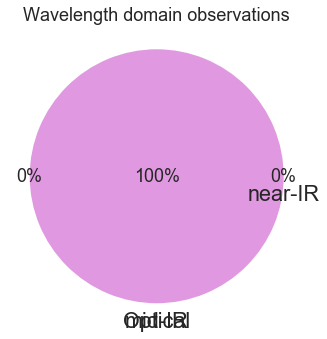

In [58]:
venn3(
    [
        np.sum(flag_obs == 4),
        np.sum(flag_obs == 2),
        np.sum(flag_obs == 6),
        np.sum(flag_obs == 1),
        np.sum(flag_obs == 5),
        np.sum(flag_obs == 3),
        np.sum(flag_obs == 7)
    ],
    set_labels=('Optical', 'near-IR', 'mid-IR'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/len(flag_obs)))
)
plt.title("Wavelength domain observations")

In [59]:
venn3(
    [
        np.sum(flag_flux[flag_obs == 7] == 4),
        np.sum(flag_flux[flag_obs == 7] == 2),
        np.sum(flag_flux[flag_obs == 7] == 6),
        np.sum(flag_flux[flag_obs == 7] == 1),
        np.sum(flag_flux[flag_obs == 7] == 5),
        np.sum(flag_flux[flag_obs == 7] == 3),
        np.sum(flag_flux[flag_obs == 7] == 7)
    ],
    set_labels=('mid-IR', 'near-IR', 'Optical'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/np.sum(flag_flux != 0)))
)
plt.title("Flux availability for the {} sources observed\n in all wavelength domains "
          "(among {} sources)".format(
              locale.format('%d', np.sum(flag_flux != 0), grouping=True),
              locale.format('%d', len(flag_flux), grouping=True)))

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/numpy/ma/core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


RuntimeError: Failed to converge after 100 iterations.

## X - Number of bands with observation

In [60]:
# We consider that a source is observed in a band when both the aperture and the full
# magnitudes are provided (some buggy catalogues miss some).

nb_bands = np.zeros(len(masterlist_catalogue), dtype=int)
for col in masterlist_catalogue.colnames:
    if 'm_app_' in col:
        fullmag_col = col.replace('m_app_', 'm_')
        nb_bands += (
            ~np.isnan(masterlist_catalogue[col].filled())
            & ~np.isnan(masterlist_catalogue[fullmag_col].filled())
        )

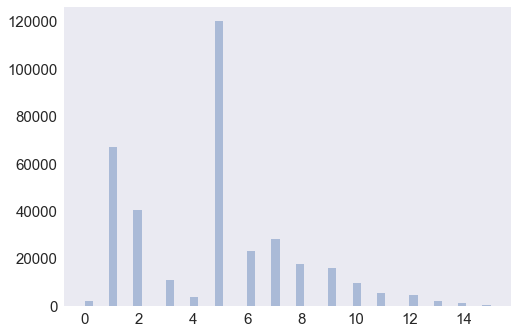

In [61]:
sns.distplot(nb_bands, kde=False)

## X - Adding the HELP Id and field columns

In [62]:
masterlist_catalogue.add_column(Column(
    utils.gen_help_id(masterlist_catalogue['ra'], masterlist_catalogue['dec']),
    name="help_id"
))
masterlist_catalogue.add_column(Column(
    np.full(len(masterlist_catalogue), "ELAIS-S1", dtype='<U18'),
    name="field"
))

In [63]:
# Check that the HELP Ids are unique
if len(masterlist_catalogue) != len(np.unique(masterlist_catalogue['help_id'])):
    print("The HELP IDs are not unique!!!")
else:
    print("OK!")

OK!


## XI - Cross-identification table

We are producing a table associating to each HELP identifier, the identifiers of the sources in the pristine catalogue. This can be used to easily get additional information from them.

In [65]:
cross_ident_table = masterlist_catalogue[
    'help_id', 'video_id', 'voice_id', 'servs_intid', 'swire_intid']
cross_ident_table.write("data/master_list_cross_ident_elais-s1.fits")

## XII - Cleaning an saving the master catalogue

In [66]:
masterlist_catalogue.remove_columns([
    'video_id', 'voice_id', 'servs_intid', 'swire_intid'])

In [67]:
# We may want to reorder the column even if this will be done at the ingestion in HeDaM.

In [68]:
masterlist_catalogue.write("data/master_catalogue_elais-s1.fits")